## Imports 

In [13]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Global params / setup

In [2]:
# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)
# pd.set_option('display.max_colwidth', None)

In [3]:
# global params
data_path = pathlib.Path.cwd().parent / "data" / "take_home_dataset.csv"

## Loading the data

In [4]:
df = pd.read_csv(
    filepath_or_buffer= data_path,
    delimiter= ";",
    )

## Basic inspection and summary fo the data 

In [5]:
df.head(3)

,#,Date,Order_ID,Order_date,Start_Shipping_Date,Estimated_Arrival_Date,Actual_Arrival_Date,Days_from_order_to_shipment,Days_from_shipment_to_delivery,Days_from_order_to_delivery,Days_between_estimated_and_actual_arrival,Product_Category,Mode_Of_Transport,Priority,Carrier_name,Warehouse,Supplier_Name,Customer_Name,Delivery_distance,Status
0,NaN,2023-07-01,3808,2023-07-01,2023-07-03,2023-07-04,2023-07-04,0,0,0,0,Apparel,Less Than Truckload,Low,UPS,BetaDepot,Supp-Z,ElecHouse,300,Order received today
1,NaN,2023-07-02,3808,2023-07-01,2023-07-03,2023-07-04,2023-07-04,0,0,0,0,Apparel,Less Than Truckload,Low,UPS,BetaDepot,Supp-Z,ElecHouse,300,Preparing for Shipment
2,NaN,2023-07-03,3808,2023-07-01,2023-07-03,2023-07-04,2023-07-04,2,0,0,0,Apparel,Less Than Truckload,Low,UPS,BetaDepot,Supp-Z,ElecHouse,300,Order has been shipped today


In [6]:
# get basic information about the dataset
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   #                                          0 non-null      float64
 1   Date                                       100 non-null    object 
 2   Order_ID                                   100 non-null    int64  
 3   Order_date                                 100 non-null    object 
 4   Start_Shipping_Date                        100 non-null    object 
 5   Estimated_Arrival_Date                     100 non-null    object 
 6   Actual_Arrival_Date                        100 non-null    object 
 7   Days_from_order_to_shipment                100 non-null    int64  
 8   Days_from_shipment_to_delivery             100 non-null    int64  
 9   Days_from_order_to_delivery                100 non-null    int64  
 10  Days_

In [7]:
# heck for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
#                                            100
Date                                           0
Order_ID                                       0
Order_date                                     0
Start_Shipping_Date                            0
Estimated_Arrival_Date                         0
Actual_Arrival_Date                            0
Days_from_order_to_shipment                    0
Days_from_shipment_to_delivery                 0
Days_from_order_to_delivery                    0
Days_between_estimated_and_actual_arrival      0
Product_Category                               0
Mode_Of_Transport                              0
Priority                                       0
Carrier_name                                   0
Warehouse                                      0
Supplier_Name                                  0
Customer_Name                                  0
Delivery_distance                              0
Status                                         0
dty

In [8]:
# display basic statistics of numeric columns
print("\nSummary Statistics for Numeric Columns:")
print(df.describe())


Summary Statistics for Numeric Columns:
         #     Order_ID  Days_from_order_to_shipment  \
count  0.0   100.000000                    100.00000   
mean   NaN  2518.040000                      0.28000   
std    NaN  1770.496951                      0.69747   
min    NaN   265.000000                      0.00000   
25%    NaN   529.000000                      0.00000   
50%    NaN  2241.000000                      0.00000   
75%    NaN  4042.000000                      0.00000   
max    NaN  5251.000000                      2.00000   

       Days_from_shipment_to_delivery  Days_from_order_to_delivery  \
count                      100.000000                   100.000000   
mean                         0.580000                     0.840000   
std                          2.000909                     2.549391   
min                          0.000000                     0.000000   
25%                          0.000000                     0.000000   
50%                          0.000

In [9]:
# Display basic statistics of categorical columns
print("\nSummary Statistics for Categorical Columns:")
print(df.describe(include='object'))


Summary Statistics for Categorical Columns:
              Date  Order_date Start_Shipping_Date Estimated_Arrival_Date  \
count          100         100                 100                    100   
unique          17           1                   1                      5   
top     2023-07-01  2023-07-01          2023-07-03             2023-07-07   
freq            14         100                 100                     38   

       Actual_Arrival_Date Product_Category    Mode_Of_Transport Priority  \
count                  100              100                  100      100   
unique                   7                5                    4        3   
top             2023-07-07        Groceries  Less Than Truckload     High   
freq                    21               34                   46       42   

        Carrier_name Warehouse Supplier_Name Customer_Name      Status  
count            100       100           100           100         100  
unique            10         7       

In [10]:
# check for unique values in each column
print("\nUnique Values per Column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")


Unique Values per Column:
#: 0 unique values
Date: 17 unique values
Order_ID: 14 unique values
Order_date: 1 unique values
Start_Shipping_Date: 1 unique values
Estimated_Arrival_Date: 5 unique values
Actual_Arrival_Date: 7 unique values
Days_from_order_to_shipment: 2 unique values
Days_from_shipment_to_delivery: 8 unique values
Days_from_order_to_delivery: 8 unique values
Days_between_estimated_and_actual_arrival: 3 unique values
Product_Category: 5 unique values
Mode_Of_Transport: 4 unique values
Priority: 3 unique values
Carrier_name: 10 unique values
Warehouse: 7 unique values
Supplier_Name: 11 unique values
Customer_Name: 11 unique values
Delivery_distance: 12 unique values
Status: 5 unique values


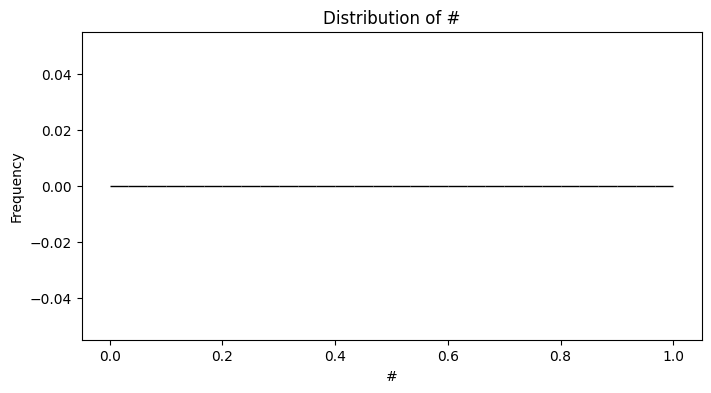

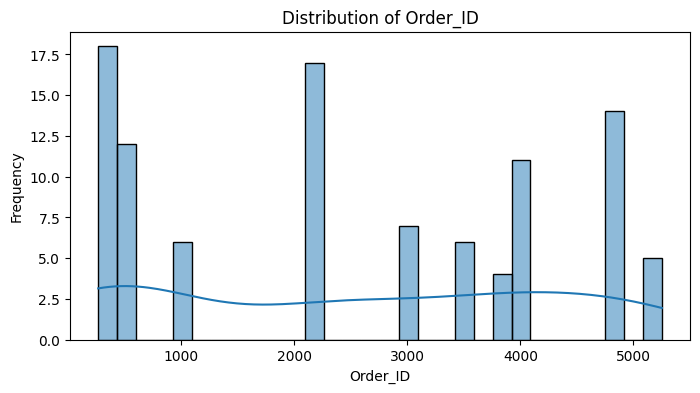

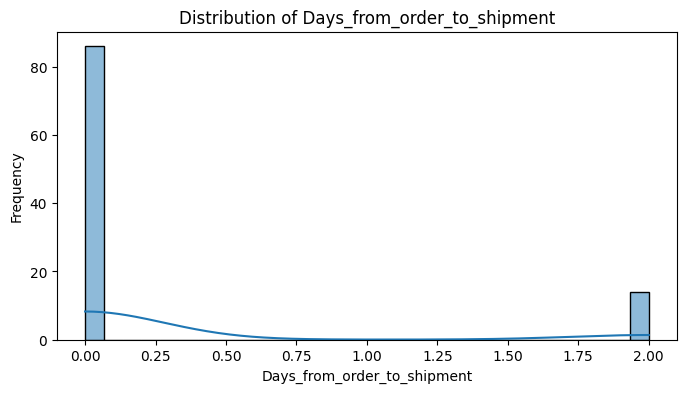

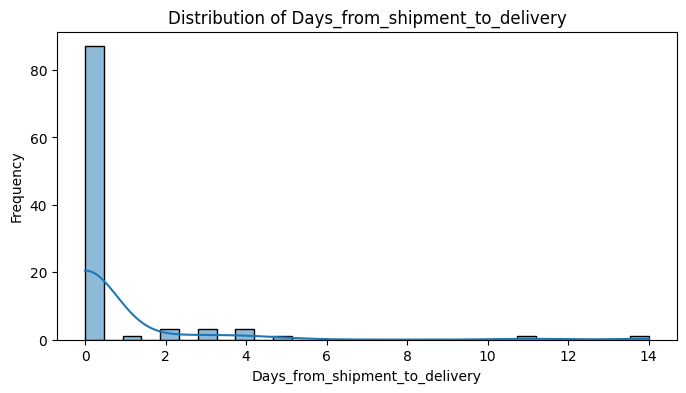

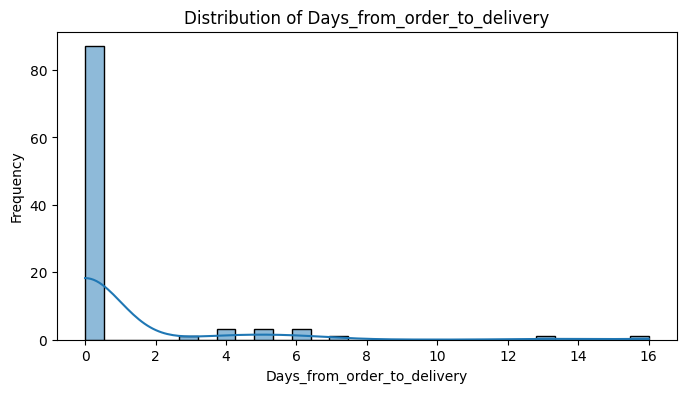

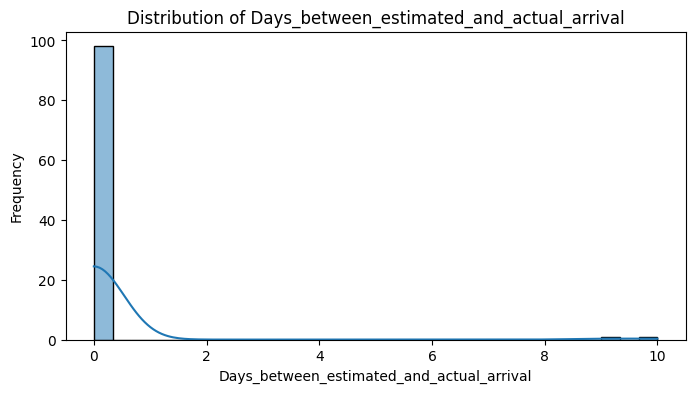

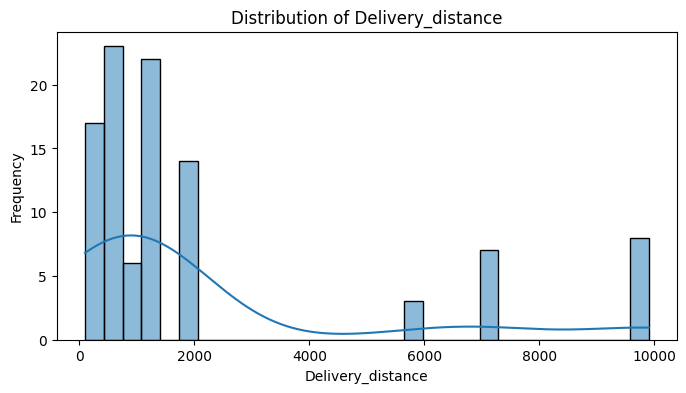

In [14]:
# distribution of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

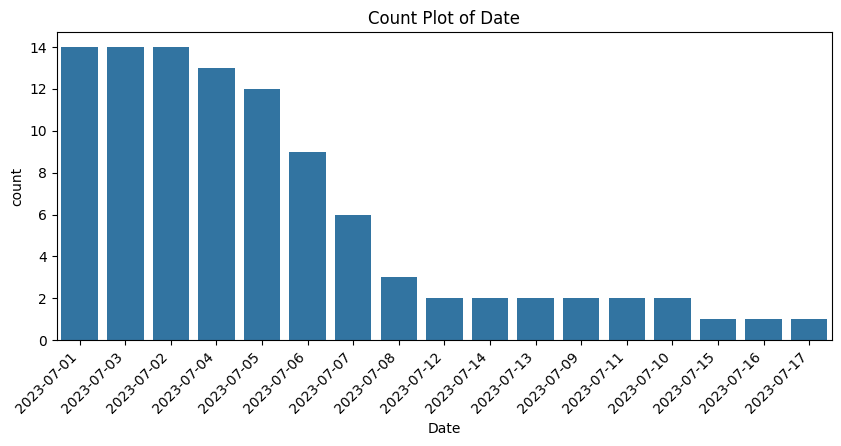

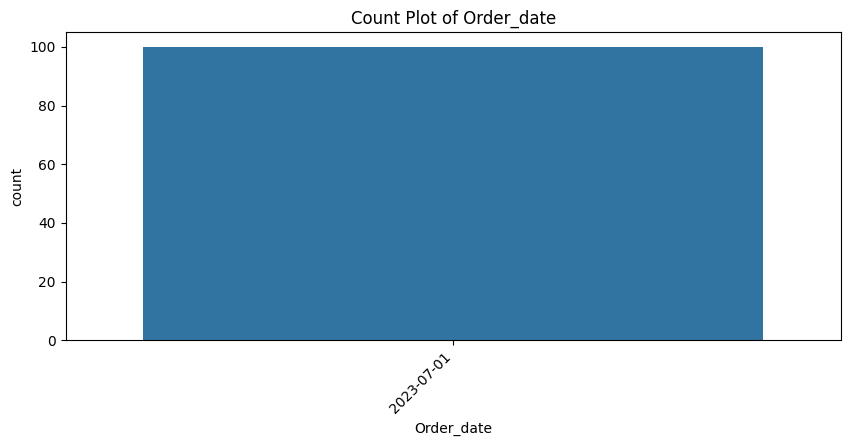

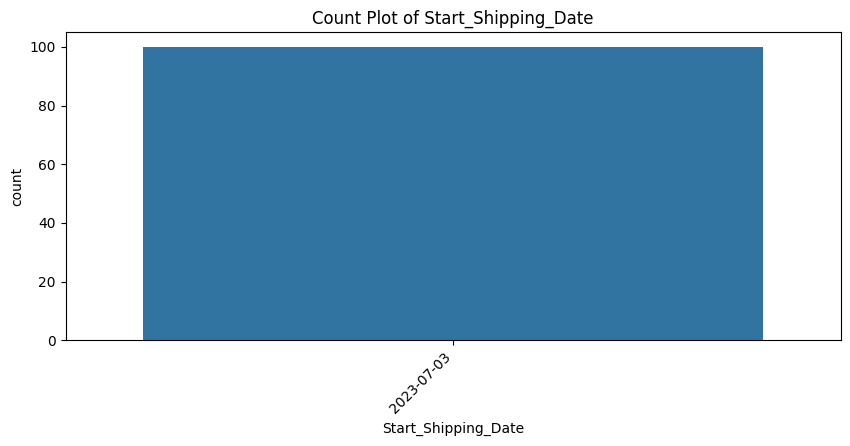

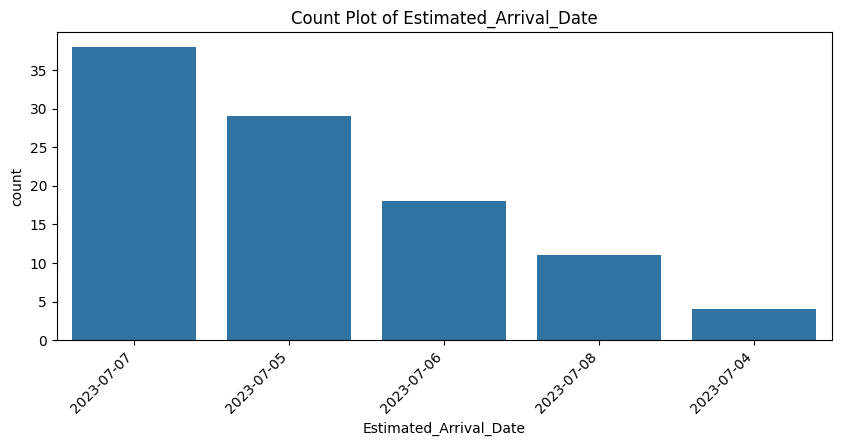

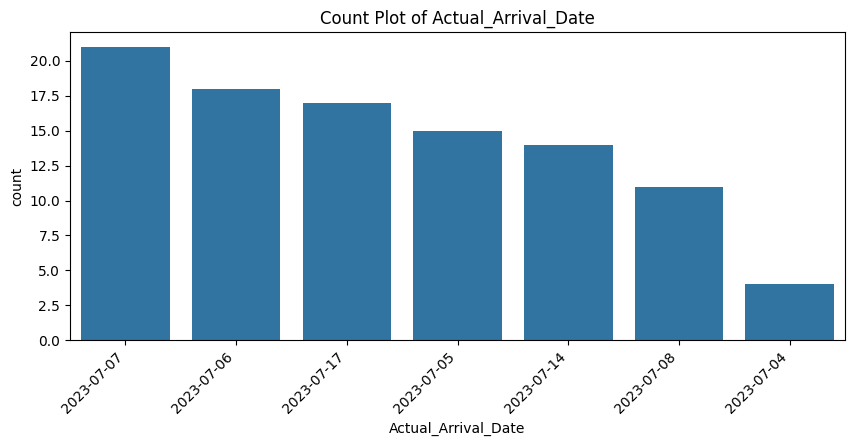

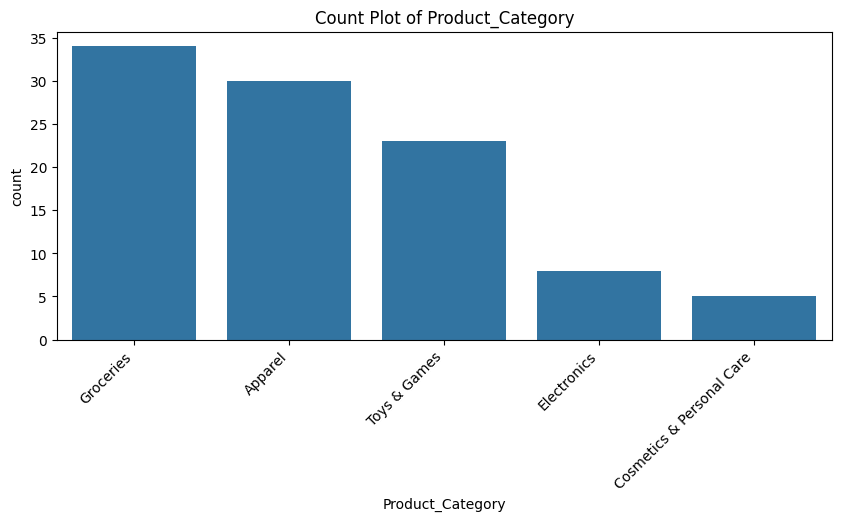

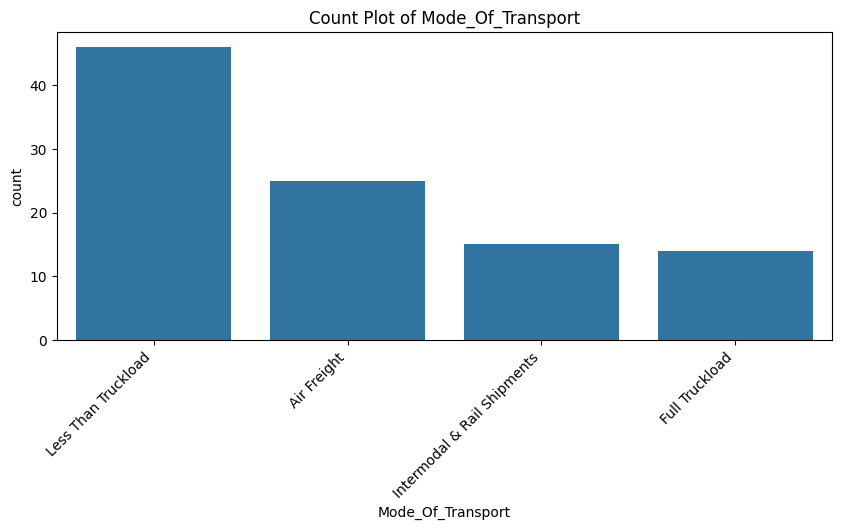

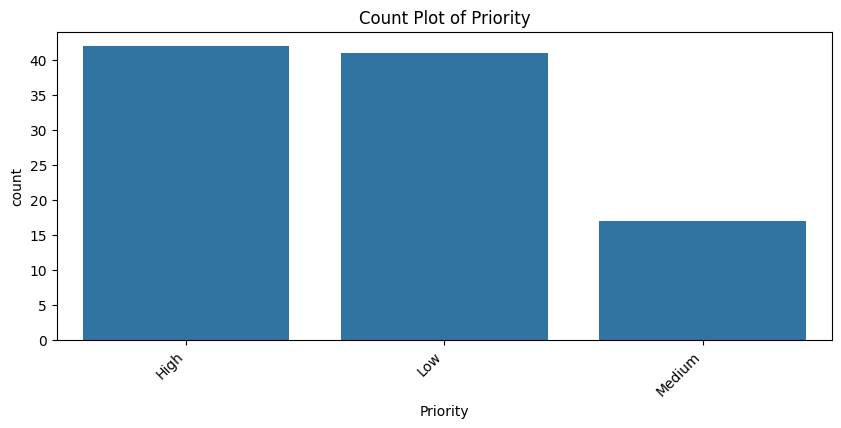

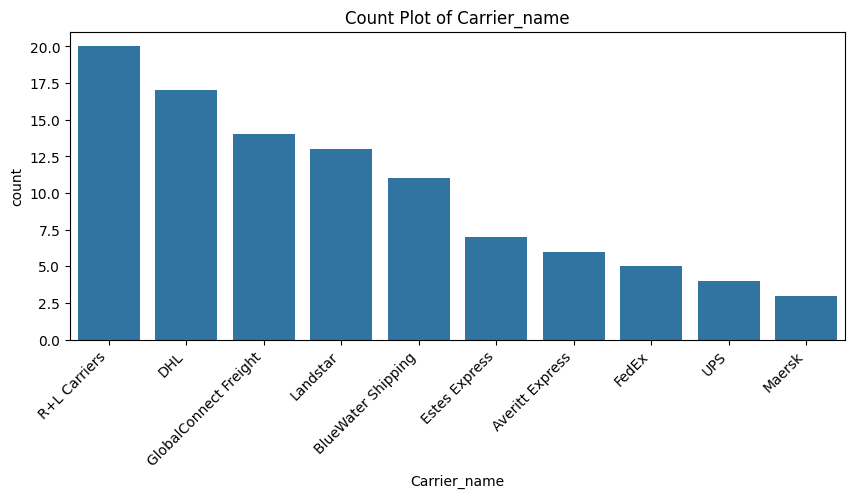

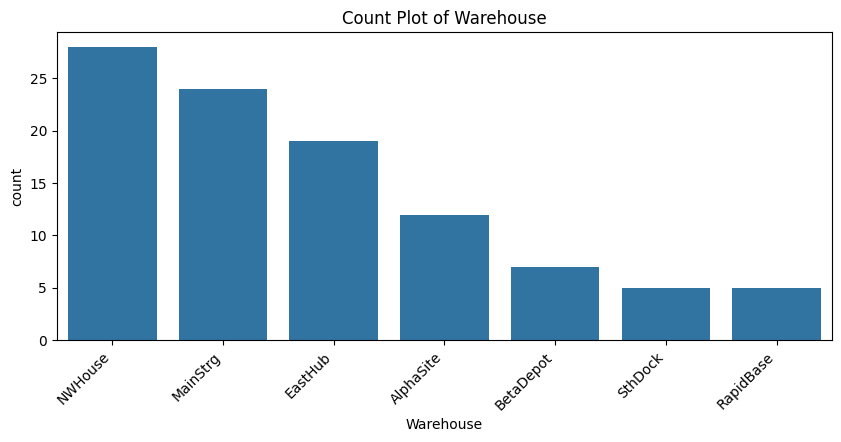

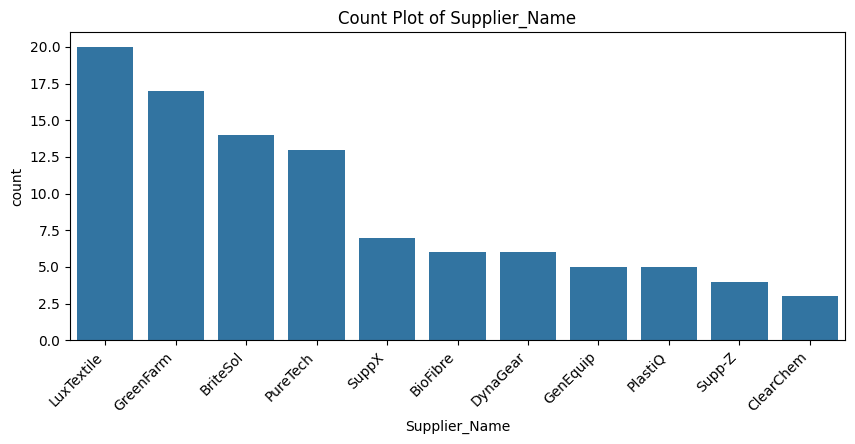

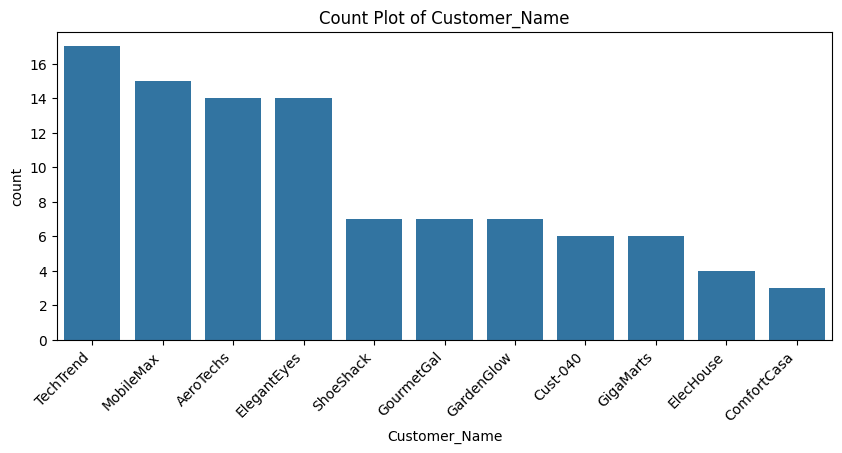

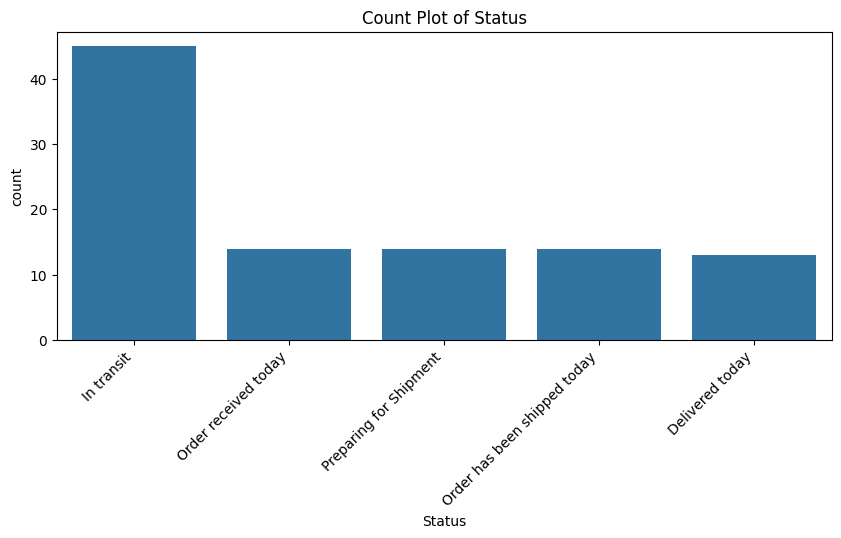

In [15]:
# count plot for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f"Count Plot of {column}")
    plt.xticks(rotation=45, ha='right')
    plt.show()

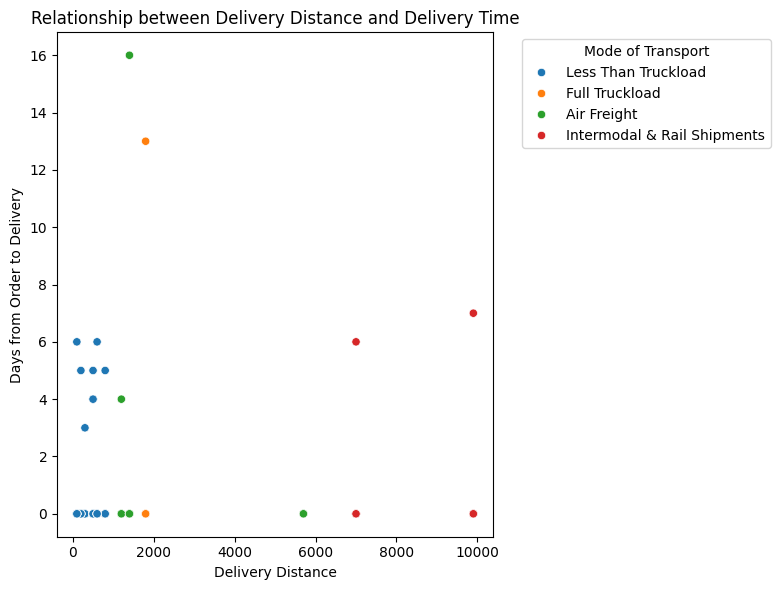

In [18]:
# Analyze relationships between key columns (scatterplots)
if 'Delivery_distance' in df.columns and 'Days_from_order_to_delivery' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='Delivery_distance', y='Days_from_order_to_delivery', hue='Mode_Of_Transport')
    plt.title("Relationship between Delivery Distance and Delivery Time")
    plt.xlabel("Delivery Distance")
    plt.ylabel("Days from Order to Delivery")

    # Move legend outside the plot
    plt.legend(title='Mode of Transport', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Show the plot
    plt.tight_layout()  # Adjust layout to prevent clipping of the legend
    plt.show()